## 1. Data Description and Analysis
- **a. Motivation to select the dataset**
>The heart disease dataset is a vital choice for an assignment because it addresses the critical issue of cardiovascular health. This dataset's analysis can lead to the development of predictive models for identifying individuals at high risk of heart disease, which is a leading cause of death globally. By examining factors like age, cholesterol levels, and blood pressure. Utilizing machine learning algorithms to identify early indicators of heart disease enables the provision of enhanced healthcare, allowing for the prevention of severe cardiac conditions. This approach facilitates timely intervention and personalized treatment strategies, significantly improving patient outcomes and healthcare efficiency.
- **Objective and Approach**
>Objective: Develop a predictive model to accurately identify the presence of heart disease in individuals based on clinical and demographic features.
>
>This model will leverage the provided dataset, which includes variables such as Age, Sex, Chest Pain Type, Resting Blood Pressure, Cholesterol Level, Fasting Blood Sugar, Resting Electrocardiogram Results, Maximum Heart Rate Achieved, Exercise-Induced Angina, ST Depression Induced by Exercise Relative to Rest (Oldpeak), and the Slope of the Peak Exercise ST Segment (ST_Slope). The goal is to analyze these features to predict the 'HeartDisease' outcome, which indicates whether an individual has heart disease (1) or not (0).
>
>The development process will involve data preprocessing, exploratory data analysis to understand the distribution and relationship of variables, feature selection to identify significant predictors, and the application of machine learning classification algorithms. The performance of the model will be evaluated using appropriate metrics such as accuracy, precision, recall, etc.

- **c. Describe the data, visualize and analyze the data**
> The Original data set can be found here [Heart Failure Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
>
>#### Attribute Information
>
>1. **Age**: age of the patient [years]
>2. **Sex**: sex of the patient [M: Male, F: Female]
>3. **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
>4. **RestingBP**: resting blood pressure [mm Hg]
>5. **Cholesterol**: serum cholesterol [mm/dl]
>6. **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
>7. **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
>8. **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
>9. **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
>10. **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
>11. **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
>12. **HeartDisease**: output class [1: heart disease, 0: Normal]


## Importing all the Required libraries for Visualization and Analysis

- Sklearn has an amazing cheat sheet that can be referenced when trying to tackle ML Problems you can find the cheat sheet by clicking [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).




In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale= 1)
%matplotlib inline

#importing classification models since we are doing bianry classificaiton
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
#Loading our data
heartdf = pd.read_csv("heart.csv")

In [ ]:
#checking to see if all our cloumns and rows have been loaded.
heartdf.shape

(918, 12)

### Visualizaiton and Analysis of the data

#### Exploratory Data Analysis (EDA) Checklist

- [ ] **Summary Statistics**: Calculate mean, median, mode, min, max, variance, and standard deviation for numerical features.
- [ ] **Distribution of Variables**: Plot histograms or box plots for numerical features to understand their distribution.
- [ ] **Count of Categories**: For categorical features, use bar charts to visualize the count of each category.
- [ ] **Null Values Analysis**: Identify the presence of null values in the dataset.
- [ ] **Outliers Detection**: Use box plots or scatter plots to detect outliers in the dataset.
- [ ] **Correlation Analysis**: Generate a heatmap or correlation matrix to examine the correlation between numerical features.
- [ ] **Pairwise Relationships**: Use scatter plots or pair plots to explore the relationships between pairs of variables.
- [ ] **Trend Analysis**: If the data is time-series, plot it to check for trends, seasonality, and cycles.
- [ ] **Text Data Analysis**: For datasets with text, perform word frequency analysis, word clouds, etc.
- [ ] **Data Quality Check**: Assess the quality of the data, checking for errors or inconsistencies.
- [ ] **Feature Distribution by Target Variable**: Compare the distribution of features based on the target variable, using box plots or violin plots for numerical features and stacked bar charts for categorical features.

(note: Checklist generated with help of ChatGPT)


In [ ]:
heartdf.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Let us find out the total number of Positive and negetive cases
heartdf["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

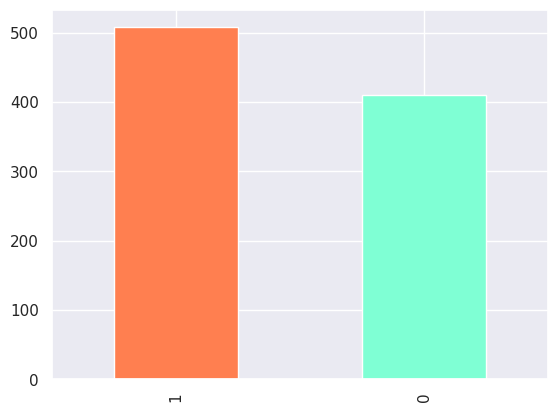

In [ ]:
# Ploting shows us that the data has an almost even split between postive (1) and negative (0)
heartdf["HeartDisease"].value_counts().plot(kind="bar", color=["coral", "aquamarine"]);

In [ ]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#check for missing value
heartdf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Learning More about our dataframe
heartdf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Comparing Age and Sex to the HeartDisease(target)

In [ ]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heartdf["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

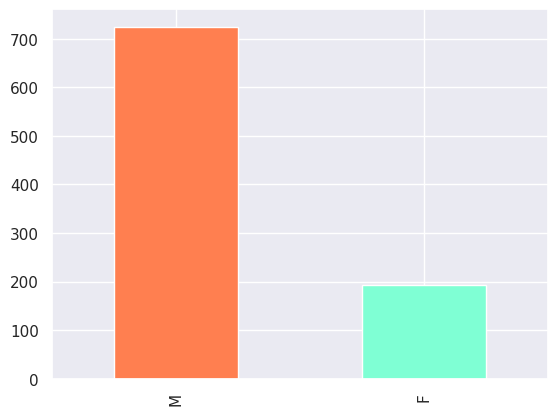

In [ ]:
heartdf["Sex"].value_counts().plot(kind="bar", color=["coral", "aquamarine"]);

From the bar chart we can conclude that in our dataset there are more number of men than women.

In [ ]:
#Here we are going to compare the Sex vs HeartDisease
male_to_female = pd.crosstab(heartdf.HeartDisease, heartdf.Sex)
male_to_female

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


Text(0, 0.5, 'No of Individuals')

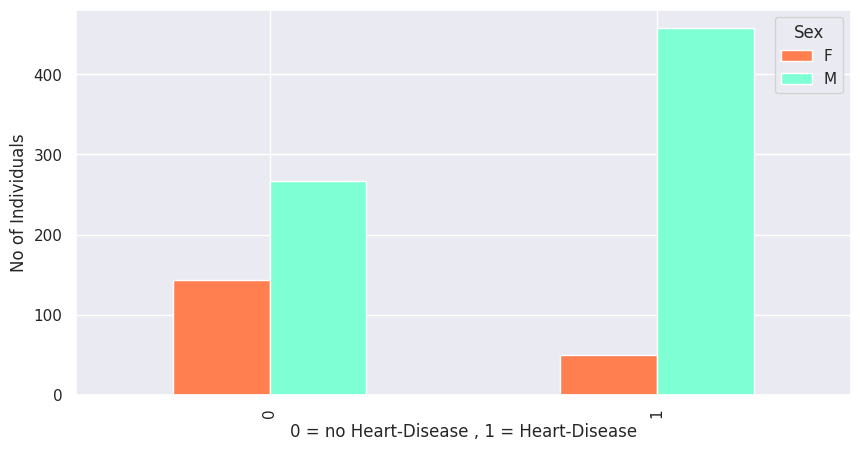

In [ ]:
#Visualising the above data
male_to_female.plot(kind="bar",
                    figsize = (10,5),
                    color = ["coral", "aquamarine"])
plt.xlabel("0 = no Heart-Disease , 1 = Heart-Disease")
plt.ylabel("No of Individuals")

#### The following can be said looking at the chart above
- There are significantly more males with heart disease compared to females with heart disease.
- The number of females without heart disease is also less than that of males without heart disease.
- The difference between the number of males with and without heart disease is larger than that for females.

In [ ]:
#Here we are going to compare the Sex vs HeartDisease
age_to_disease = pd.crosstab(heartdf.HeartDisease, heartdf.Age)
age_to_disease

Age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
HeartDisease,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,1,3,1,5,7,4,10,...,4,3,1,3,1,0,2,1,1,0
1,0,0,0,1,2,1,2,4,2,1,...,6,10,6,2,3,1,5,2,1,2


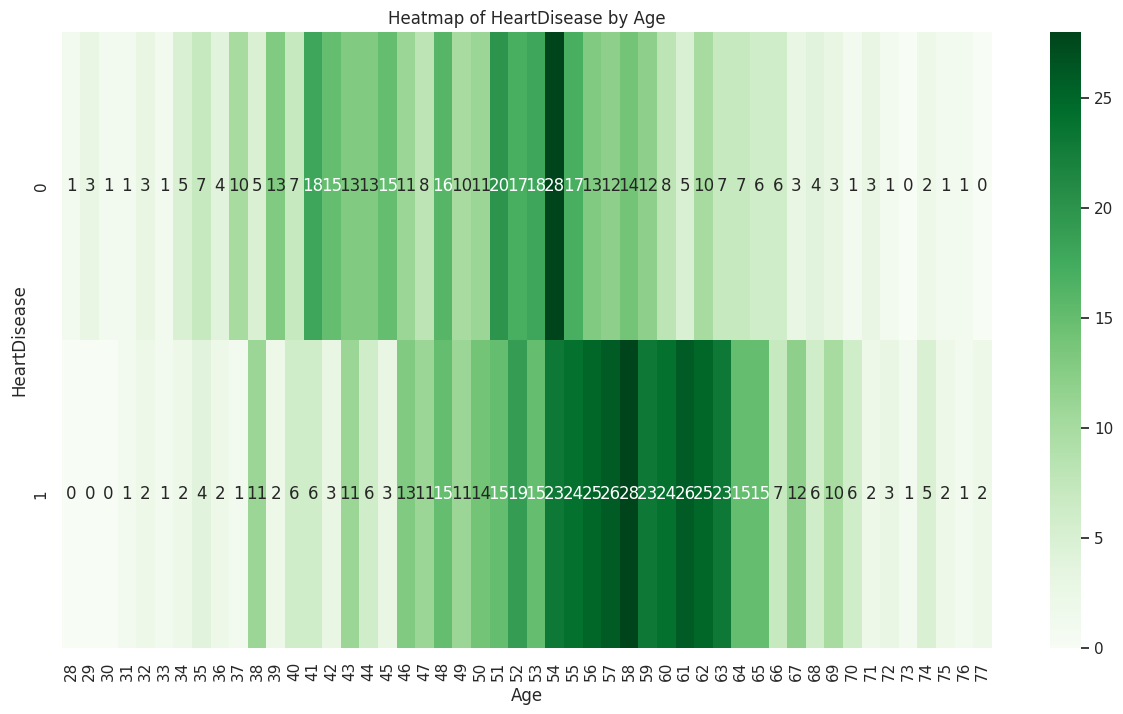

In [ ]:
#Heatmap of at what age is heart disease most prevelant
age_to_disease = pd.crosstab(heartdf.HeartDisease, heartdf.Age)
plt.figure(figsize=(15, 8))
sns.heatmap(age_to_disease, annot=True, fmt="d", cmap="Greens")
plt.ylabel("HeartDisease")
plt.xlabel("Age")
plt.title("Heatmap of HeartDisease by Age")
plt.show()


The heat map does reveal that in our data set the age range 54-63 has the highest no of patients with a heart ailgnment.

#### Lets look at age when compared to heart rate for heart disease  

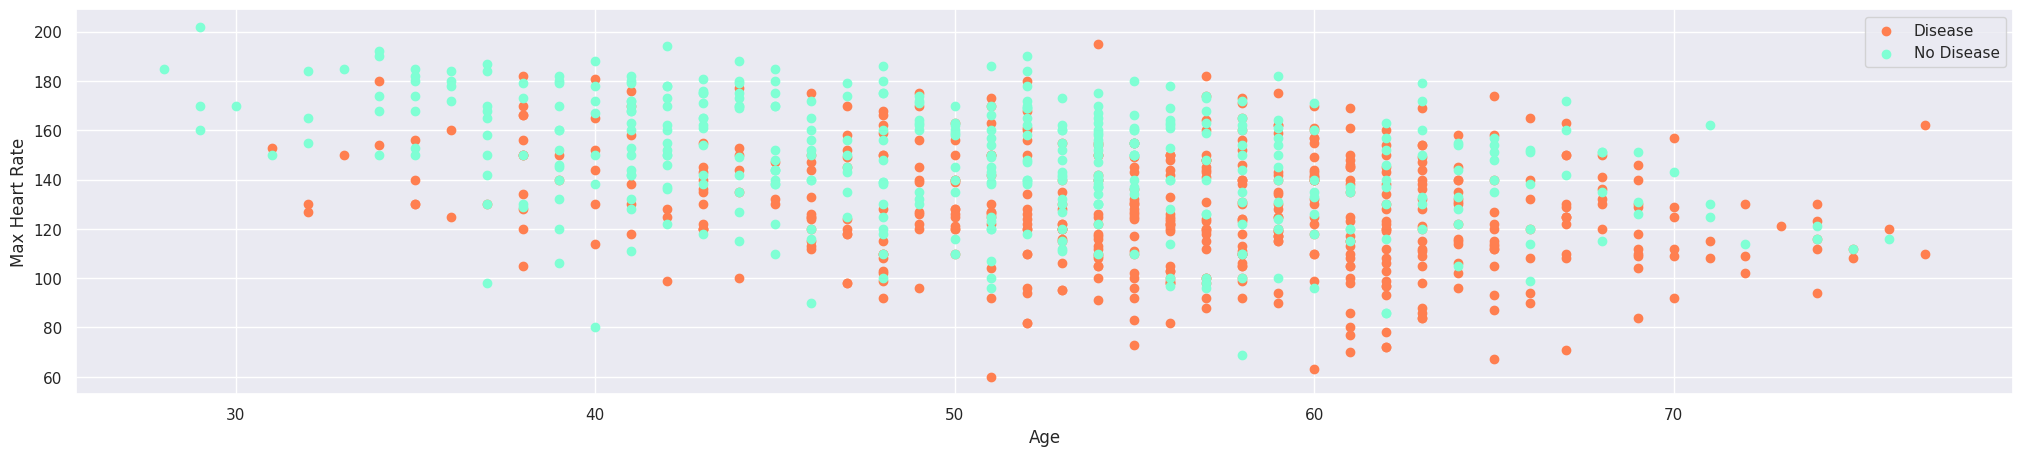

In [ ]:
# Let's Visualise the Age vs Max Heart-rate
plt.figure(figsize=(25,5))

#positve
plt.scatter(heartdf.Age[heartdf.HeartDisease==1],
            heartdf.MaxHR[heartdf.HeartDisease==1],
            c="coral") # define it as a scatter figure
#negetive
plt.scatter(heartdf.Age[heartdf.HeartDisease==0],
            heartdf.MaxHR[heartdf.HeartDisease==0],
            c="aquamarine")

# Add some helpful info
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

While the plot looks cool, it is not possible to make any meaningful interprations out of it we will lean on our ML model to help us later on.
#### Let us check the distribution of Age across our database

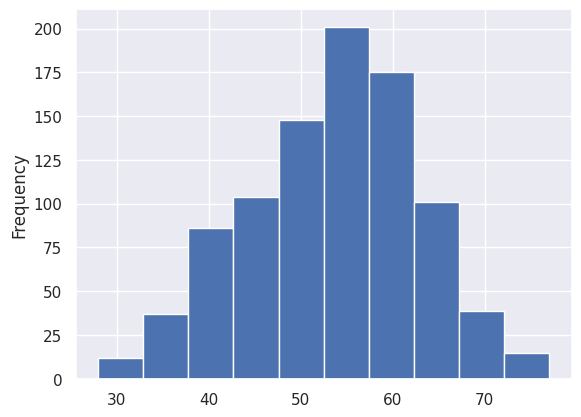

In [ ]:
heartdf.Age.plot.hist();

### Which Type of chest pain is related to heart disease?

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


In [ ]:
chestpain_vs_target = pd.crosstab(heartdf.ChestPainType, heartdf.HeartDisease)
chestpain_vs_target

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


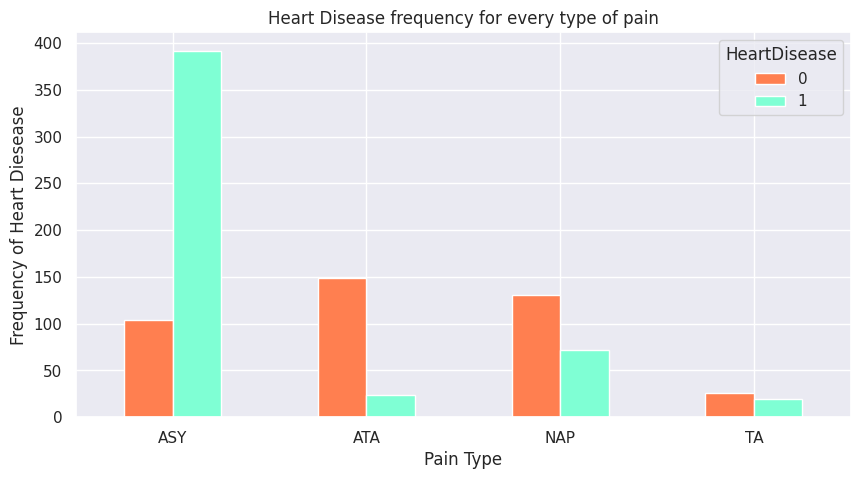

In [ ]:
chestpain_vs_target.plot(kind="bar",
                         figsize=(10,5),
                         color = ["coral","aquamarine"]
                         )
plt.title("Heart Disease frequency for every type of pain")
plt.xlabel("Pain Type")
plt.ylabel("Frequency of Heart Diesease")
plt.xticks(rotation=0);

##### From the graph above we can see that most Heart Diesease in our data set show ASY (Asymptomatic) pain.

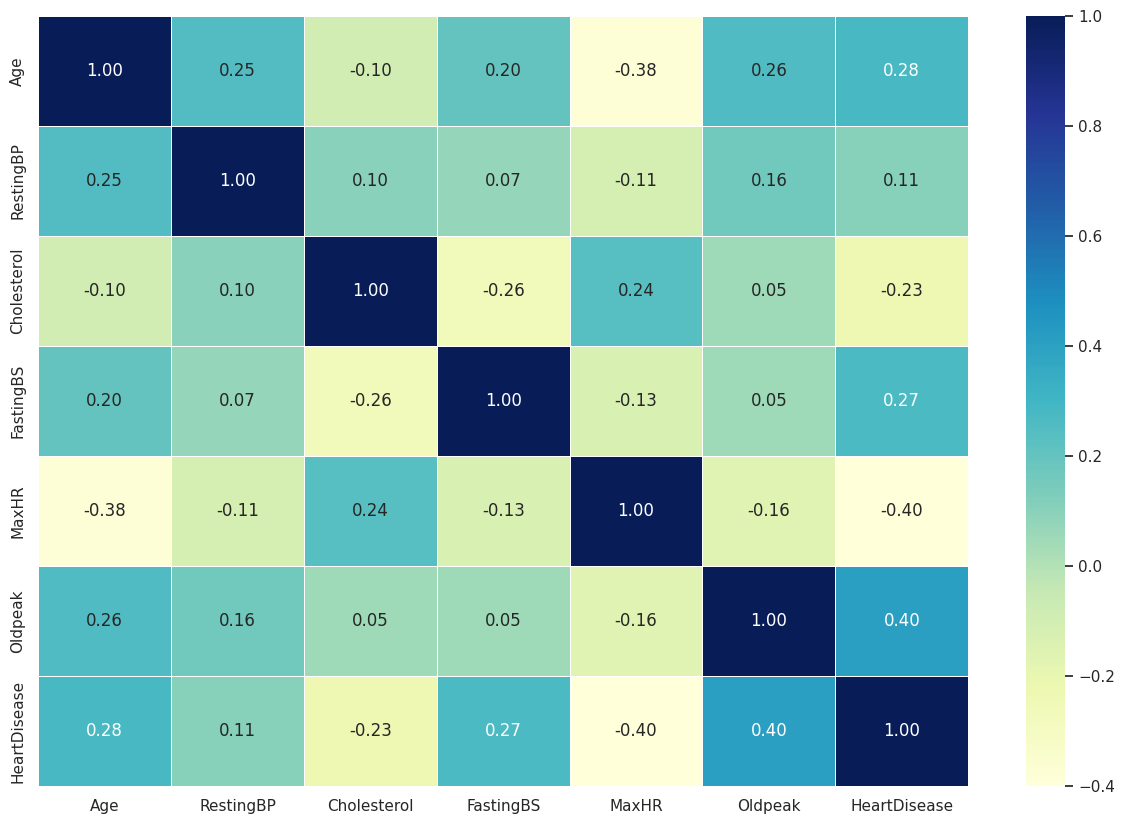

In [ ]:
corr_matrix = heartdf.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

In [ ]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


A higher positive value means a potential positive correlation between the two terms and a higher negative value means a potential negative correlation that means they are not so dependent on each other.

However, this is only considering the numerical values in our data set as many attributes are of the type object rather than int.

## 2. Prediction
- ### Spliting the Data



In [ ]:
#Split the data

In [ ]:
x = heartdf.drop("HeartDisease", axis= 1)

In [ ]:
y = heartdf.HeartDisease

In [ ]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
#split data into train and test sets
np.random.seed(42)
x_train, x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2)

In [ ]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up


We can see that the values have been randomised from before.

- ### Selecting a Model
> We will be working the following 4 Classifiers
>
> a. Logistic Regression
>
> b. KNN
>
> c. Ramdom Forest
>
>d. Naive Bayes

In [ ]:
models = {"LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RF": RandomForestClassifier(),
          "NB": GaussianNB()}
#Creating a Function that will fit the data to the models and tell us
#which model scored the most.
def model_fitter(models, x_train, x_test, y_train, y_test):
  # a random seed to keep the results consistent thanks to "The Hitchhiker’s Guide to the Galaxy"
  np.random.seed(42)
  model_score = {}
  for name , model in models.items():
    #fitting the data
    model.fit(x_train,y_train)
    #evaluation
    model_score[name] = model.score(x_test,y_test)
  return model_score

In [ ]:
#turns string classifiers into numbers.
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,1,194,0.8,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,36,130,209,0,178,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,37,130,211,0,142,0.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,51,120,0,1,104,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
# Now, fit your model as before
model_score = model_fitter(models=models, x_train=x_train, x_test=x_test,
                           y_train=y_train, y_test=y_test)

model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8532608695652174,
 'KNN': 0.7065217391304348,
 'RF': 0.8804347826086957,
 'NB': 0.8641304347826086}

## Model Comparision

<Axes: >

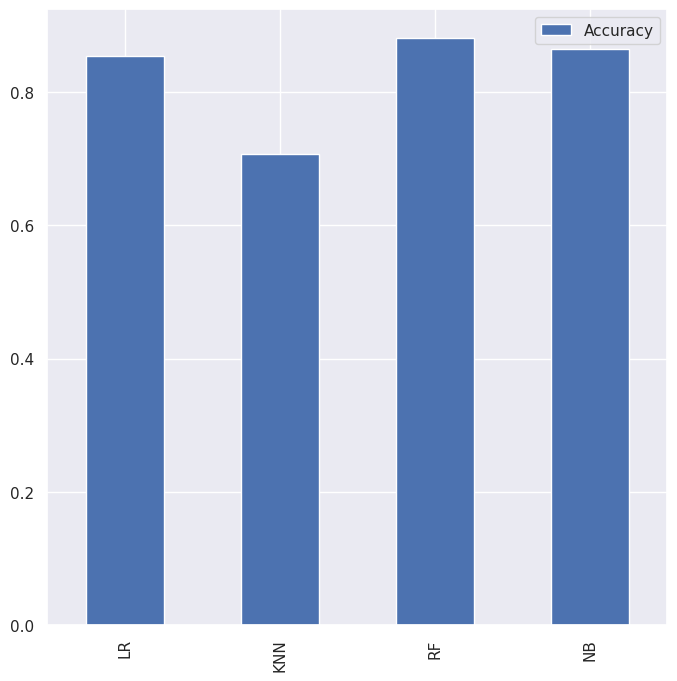

In [ ]:
model_compare = pd.DataFrame(model_score, index = ["Accuracy"]) #scikit learn default is Accuracy
model_compare.T.plot.bar(figsize=(8,8))

Without any optimization it is evident that KNN is not a good model and Logistic Regression, Random Forest and Naive Bayes are neck in neck.

### Maximizing Model Peformance

Let us star with tuning the hyperparameters(the different setting in which we can run our model) of the model.

In [ ]:
#Let us start by trying out different n neighbours values

result_train = []
result_test = []

#creating a range of different neighbours to try i.e the n value
n = range(1,20)
knn = KNeighborsClassifier()

for i in n:
  knn.set_params(n_neighbors = i)
  knn.fit(x_train,y_train)
  result_train.append(knn.score(x_train,y_train))
  result_test.append(knn.score(x_test,y_test))

Maximum KNN Result on the test data: 70.65%
This is the best score and it was achieved at n = 5


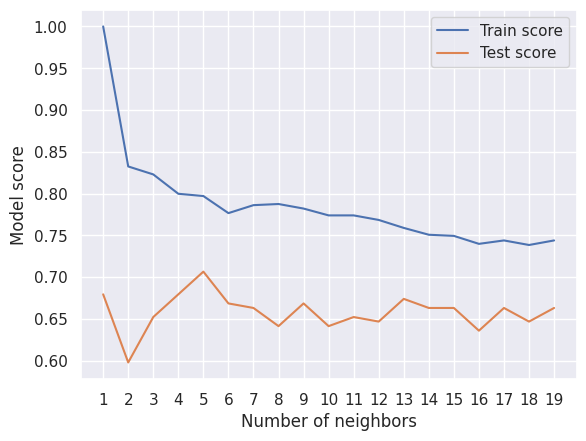

In [ ]:
# Find the index of the highest test score
max_index = np.argmax(result_test)
# Find the corresponding n value
best_n = n[max_index]

plt.plot(n, result_train, label="Train score")
plt.plot(n, result_test, label="Test score")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN Result on the test data: {max(result_test)*100:.2f}%")
print(f"This is the best score and it was achieved at n = {best_n}")

#### Result of KNN tuning
* After changing the n value which by default is 5 to a range of n values from 1 to 20 it is evident that at 5 neares neigbors the model yeild thes best results of 70.65%.
* Since our goal is achieve atleast 95% we need to turn to other models.

### Tuning Model Using RandomizedSearchCV to see which amongst the 3 listed below performs the best
* Logistic Regression
* Ramdom Forest
* Naive Bayes

In [ ]:
logR_grid = {'C': np.logspace(-4, 4, 40),
             'solver': ['liblinear'],
             'penalty': ['l1','l2']} #The Penalty is where regularization is occuring

randF_grid = {"n_estimators": np.arange(10,1000,50),
              "max_depth": [None, 3, 5 ,10],
              "min_samples_split":np.arange(2,20,2),
              "min_samples_leaf": np.arange(1,20,1)}

NaiveB_grid = {'var_smoothing': np.logspace(-10, -1, 40)}



In [ ]:
def tune_model(estimator, param_grid, x_train, y_train, x_test, y_test, n_iter=20, cv=10):
    # Initialize the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator, param_distributions=param_grid,
                                       n_iter=n_iter, cv=cv, verbose=1,
                                       random_state=42, n_jobs=-1)
    # Fit RandomizedSearchCV on the training data
    random_search.fit(x_train, y_train)

    # Evaluate the best model on the test data
    score = random_search.score(x_test, y_test)

    # Get the best parameters
    best_params = random_search.best_params_

    # Return the score, best_params, and the fitted RandomizedSearchCV object
    return score, best_params, random_search


# Create a list of tuples containing models and their respective grids
models_and_grids = [
    (LogisticRegression(), logR_grid),
    (RandomForestClassifier(), randF_grid),
    (GaussianNB(), NaiveB_grid)]

# Loop through the list and call the tune_model function for each model
for model, grid in models_and_grids:
    test_score, best_parameters, fitted_model = tune_model(
        model, grid, x_train, y_train, x_test, y_test)

    # Output the results
    print("Results Using RandomSearch CV ")
    print()
    print(f"Results for {model.__class__.__name__}:")
    print("Best Test Score:", test_score)
    print("Best Parameters:", best_parameters)
    print()  # Blank line for readability

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Results Using RandomSearch CV 

Results for LogisticRegression:
Best Test Score: 0.8586956521739131
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.30702906297578497}

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Results Using RandomSearch CV 

Results for RandomForestClassifier:
Best Test Score: 0.8804347826086957
Best Parameters: {'n_estimators': 160, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_depth': 10}

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Results Using RandomSearch CV 

Results for GaussianNB:
Best Test Score: 0.875
Best Parameters: {'var_smoothing': 8.376776400682924e-07}



### Summary of Tunning with RandomSearchCV

* As we can see that there were marginal differences between the baseline model and the tuned models.
* However, one thing note was Naive Bayes performed little bit worse than it's base.
* Some noteable best parameters were a max depth of 10 for RandomForestClassifier and the C value of 0.30702906297578497 for Logistic Regression

In [ ]:

def tune_model_gs(estimator, param_grid, x_train, y_train, x_test, y_test,
                  cv=10):
    # Initialize the RandomizedSearchCV object
    gridcv_search = GridSearchCV(estimator, param_grid=param_grid,
                                       cv=cv, verbose=1,n_jobs=-1)
    # Fit RandomizedSearchCV on the training data
    gridcv_search.fit(x_train, y_train)

    # Evaluate the best model on the test data
    score = gridcv_search.score(x_test, y_test)

    # Get the best parameters
    best_params = gridcv_search.best_params_

    # Return the score, best_params, and the fitted RandomizedSearchCV object
    return score, best_params, gridcv_search

models_and_grids_gs = [
    (LogisticRegression(), logR_grid),
    (GaussianNB(), NaiveB_grid)]

# Loop through the list and call the tune_model function for each model
# Assuming logR_grid and NaiveB_grid are defined, along with x_train, y_train, x_test, y_test

# Directly call tune_model_gs for Logistic Regression and assign returned values to specific variables
logR_test_score, logR_best_parameters, logR_gs = tune_model_gs(
    LogisticRegression(), logR_grid, x_train, y_train, x_test, y_test, cv=10
)

# Directly call tune_model_gs for Gaussian Naive Bayes and assign returned values to specific variables
gaussianNB_test_score, gaussianNB_best_parameters, gaussianNB_gs = tune_model_gs(
    GaussianNB(), NaiveB_grid, x_train, y_train, x_test, y_test, cv=10
)

# Output the results for Logistic Regression
print("Results Using GridSearchCV for Logistic Regression")
print("Best Test Score:", logR_test_score)
print("Best Parameters:", logR_best_parameters)
print()  # Blank line for readability

# Output the results for Gaussian Naive Bayes
print("Results Using GridSearchCV for Gaussian Naive Bayes")
print("Best Test Score:", gaussianNB_test_score)
print("Best Parameters:", gaussianNB_best_parameters)
print()  # Blank line for readability


Fitting 10 folds for each of 80 candidates, totalling 800 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Results Using GridSearchCV for Logistic Regression
Best Test Score: 0.8532608695652174
Best Parameters: {'C': 0.49238826317067363, 'penalty': 'l2', 'solver': 'liblinear'}

Results Using GridSearchCV for Gaussian Naive Bayes
Best Test Score: 0.8586956521739131
Best Parameters: {'var_smoothing': 7.017038286703837e-06}



### Summary of tuning with GridSearchCV

* Due to the large number of levels of the tree we had to skip tuning with GridSearchCV as would make close to 300,000 total fits and that type of computation can take hours, so to to it has to be eliminated.

* Between the two remaining models the base Naive Bayes did better without any tuning so the inconsistency so there may be an argument to eliminate Naive Bayes.

## Let's Look at our models beyond the default Accuracy

### Namely the following

* Confusion Matrix
* Prescision
* Recall
* Classification Report

In [ ]:
# Nowmaking predictions
y_predict_logR = logR_gs.predict(x_test)
y_predict_gaussianNB = gaussianNB_gs.predict(x_test)

In [ ]:
y_predict_logR

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
y_predict_gaussianNB

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

### ROC and AUC

* ROC Curve: A graphical plot that illustrates the diagnostic ability of a binary classification system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
* AUC (Area Under the ROC Curve): A single scalar value that summarizes the ROC curve. It measures the entire two-dimensional area underneath the entire ROC curve. AUC values range from 0 to 1, where a value of 1 represents a perfect model and a value of 0.5 represents a model that performs no better than random chance.

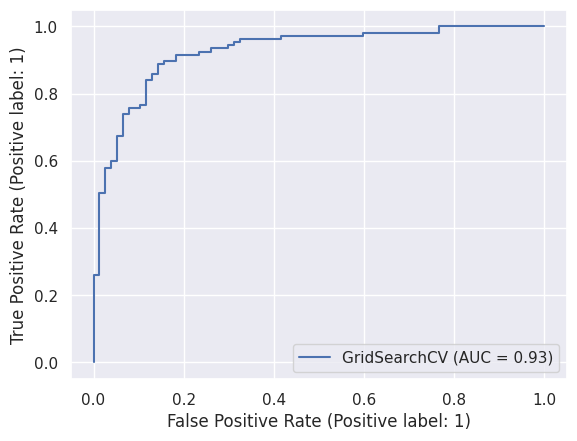

In [ ]:
#ROC and AUC for our tuned logistic regression model
RocCurveDisplay.from_estimator(estimator=logR_gs,
                               X=x_test,
                               y=y_test);

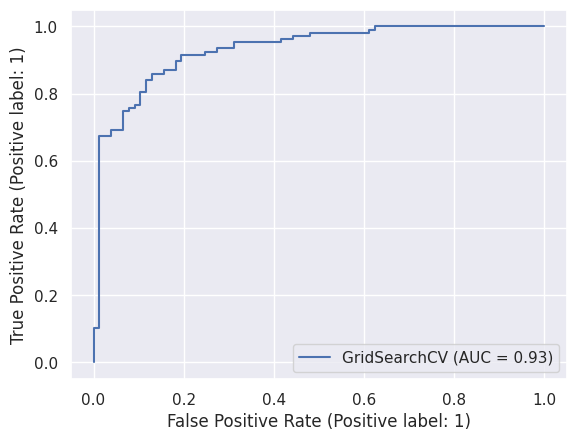

In [ ]:
#ROC and AUC for our tuned Naive Bayes model
RocCurveDisplay.from_estimator(estimator=gaussianNB_gs,
                               X=x_test,
                               y=y_test);

In [ ]:
#Confusion Matrix for Logistic Regression
logR_cMatrix = confusion_matrix(y_test,y_predict_logR)
#Confusion Matrix for Naive Bayes
gaussianNB_cMatrix = confusion_matrix(y_test,y_predict_logR)

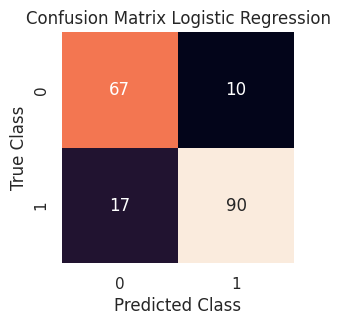

In [ ]:


def plot_conf_mat():
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(logR_cMatrix,
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.title("Confusion Matrix Logistic Regression")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")

plot_conf_mat()

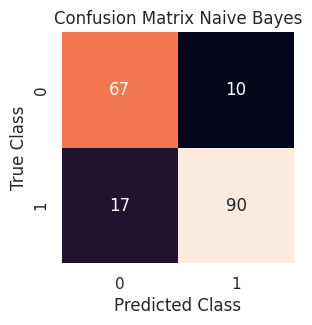

In [ ]:


def plot_conf_mat():
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(gaussianNB_cMatrix,
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.title("Confusion Matrix Naive Bayes")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")

plot_conf_mat()

> ##### Since confusion matrix is and ROC curves are similar we will take only take logistic regression into consideration as it is ideal for binary classification problem and Gaussain Naive Bayes is more suited to text based problems

## Important Features

> Before we get to calaculating different metrics regarding our model on our data set it is a good idea to look at which features of the dataset contributed the most to these metrics.

In [ ]:
logR_best_parameters

{'C': 0.49238826317067363, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
cls = LogisticRegression(C= 0.49238826317067363, penalty= 'l2', solver= 'liblinear')
cls.fit(x_train,y_train)

LogisticRegression(C=0.49238826317067363, solver='liblinear')

> #### We can find out how much each columns affected the final outcome by mapping the coefficent to the feature. We can refer to our coefficient matrix that shows us which values were effected the most.

In [ ]:
map_feature = dict(zip(heartdf.columns, list(cls.coef_[0])))
map_feature

{'Age': 0.013413052732062149,
 'Sex': 0.0012633282612772292,
 'ChestPainType': -0.004849737858415736,
 'RestingBP': 0.8618619203780767,
 'Cholesterol': -0.005960163925035873,
 'FastingBS': 0.46033699231248554,
 'RestingECG': -0.6084742142727285,
 'MaxHR': 0.5612908070039242,
 'ExerciseAngina': 0.926489227098127,
 'Oldpeak': -0.4380556362595636,
 'ST_Slope': -0.4600096219289415,
 'HeartDisease': -0.07560737617840893}

> #### The Positive values had more of an impact on our model than the negetive values.
>
> #### Let Us now visualise this information for better understanding which features stand out the most.

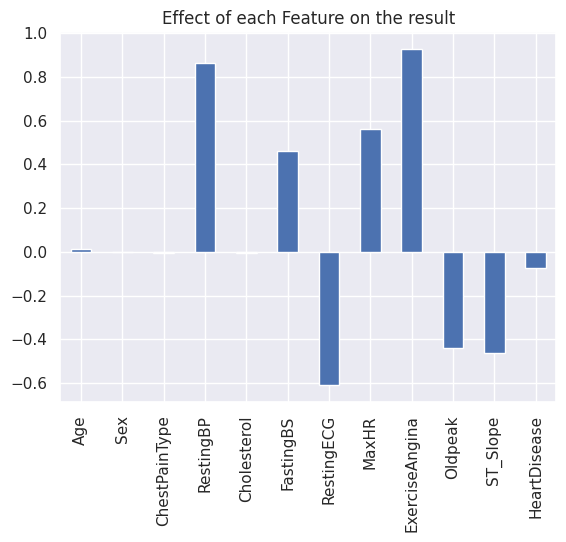

In [ ]:
featuredf = pd.DataFrame(map_feature, index=[0])
featuredf.T.plot.bar(title="Effect of each Feature on the result", legend=False);

# Effect of each Feature on the Result

The bar chart illustrates the influence of various features on a predictive model's outcome. Each bar represents a feature's coefficient, which indicates its impact:

- `Age`: Shows a negligible positive effect on the result.
- `Sex`: Has a minor negative impact.
- `ChestPainType`: Exhibits a significant positive effect.
- `RestingBP`: Appears to have a modest positive influence.
- `Cholesterol`: Has a small positive impact.
- `FastingBS`: Indicates a slight negative effect.
- `RestingECG`: Shows a negligible negative influence.
- `MaxHR`: Demonstrates a substantial negative impact.
- `ExerciseAngina`: Has a notable negative effect.
- `Oldpeak`: Reveals a significant negative impact.
- `ST_Slope`: Indicates a strong negative effect.
- `HeartDisease`: It's included in the features, which is unusual as it typically would be the target variable. However, it shows a strong negative effect.

Overall, the features with the most significant positive impact are `ChestPainType`, and those with the most substantial negative impact are `Oldpeak` and `ST_Slope`.


# Conclusion

In [ ]:
#Printing the classification report for Naive Bayes
print(classification_report(y_test,y_predict_gaussianNB))
print(classification_report(y_test,y_predict_logR))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
#recalculating all the metrics using k-fold cv

In [ ]:
logR_best_parameters

{'C': 0.49238826317067363, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
classifier = LogisticRegression(C= 0.49238826317067363, penalty= 'l2', solver= 'liblinear')

> Now we will calculate Accuracy, Precision and Recall using k-fold Cross Validation

In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
x = pd.get_dummies(x)
cvlogR_acc = cross_val_score(classifier, x , y , cv = 20, scoring= "accuracy")
cvlogR_acc

array([0.89130435, 0.7826087 , 0.91304348, 0.89130435, 0.93478261,
       0.89130435, 0.97826087, 0.95652174, 0.97826087, 0.7173913 ,
       0.84782609, 0.89130435, 0.82608696, 0.95652174, 0.86956522,
       0.82608696, 0.76086957, 0.76086957, 0.77777778, 0.77777778])

In [ ]:
#taking the average
cvlogR_acc = np.mean(cvlogR_acc)
cvlogR_acc

0.8614734299516907

In [ ]:
cvlogR_precision = cross_val_score(classifier, x, y, cv=20, scoring='precision')
cvlogR_precision = np.mean(cvlogR_precision)
cvlogR_precision

0.8759868004541043

In [ ]:
cvlogR_recall = cross_val_score(classifier, x, y, cv=20, scoring='recall')
cvlogR_recall = np.mean(cvlogR_recall)
cvlogR_recall

0.8837692307692306

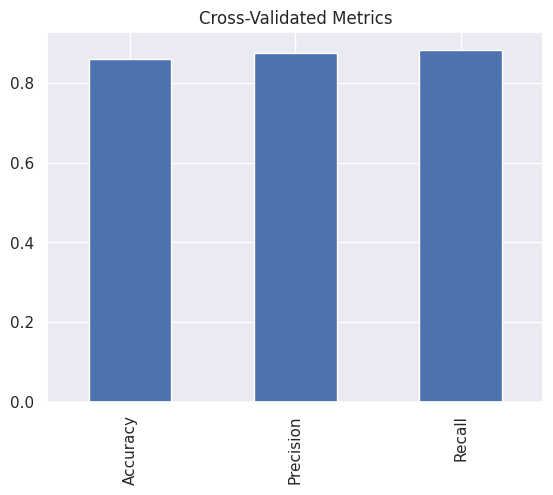

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cvlogR_acc,
                            "Precision": cvlogR_precision,
                            "Recall": cvlogR_recall,},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

> From the above figure we can see that our model does paticularly well when it comes Recall how ever the difference between the three metrics is very similar.

# Model Performance and Improvement Strategies

## Current Model Performance
Achieving an accuracy rate of over 86% is commendable, especially in the context of predicting critical conditions like heart disease. However, this level of accuracy is not ideal. Our analysis, informed by the confusion matrix, indicates a substantial number of both false positives and false negatives. Although false positives are generally more acceptable than false negatives in medical diagnostics, our ultimate goal is to minimize both.

## Objective
We are aiming to refine our model's accuracy to at least 95%. Since this target has not yet been met, further improvements and research are essential.

## Strategies for Enhancement

### Data Quality and Sample Size
- **Reassess Data Quality**: A thorough review of our data quality is necessary to ensure its adequacy for the predictive tasks.
- **Evaluate Sample Size**: A larger sample size might be required for the model to accurately learn and generalize.

### Model Complexity and Tuning
- **Advanced Models**: Investigating more complex classification models could prove beneficial in achieving our accuracy goal.
- **Hyperparameter Tuning**: Fine-tuning the existing models' hyperparameters may yield better performance tailored to our specific machine learning task.

Through these strategies, we will strive to enhance the predictive accuracy of our model, making it more reliable for diagnosing heart disease.
